In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib import rcParams

rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False

df = pd.read_csv(r'C:\\test-PROJECT4\\bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


EDA의 핵심 - 이 데이터로 y(가입여부)를 예측할 수 있는가? 어떤 변수가 가장 영향력이 큰가? 를 보여주는 것

수치형 - duration, euribor3m, nr.employed가   Y(가입여부 Yes/No를 가장 잘 나눔)
        통화 시간이 길수록, 저금리, 고용자 수가 낮을수록 가입률이 높음

범주형 - poutcome(이전 캠페인 성공 여부)가 압도적
         success 65%, failure 14%, nonexistent 8%
        이전 캠페인에서 성공한 고객은 재가입률이 압도적

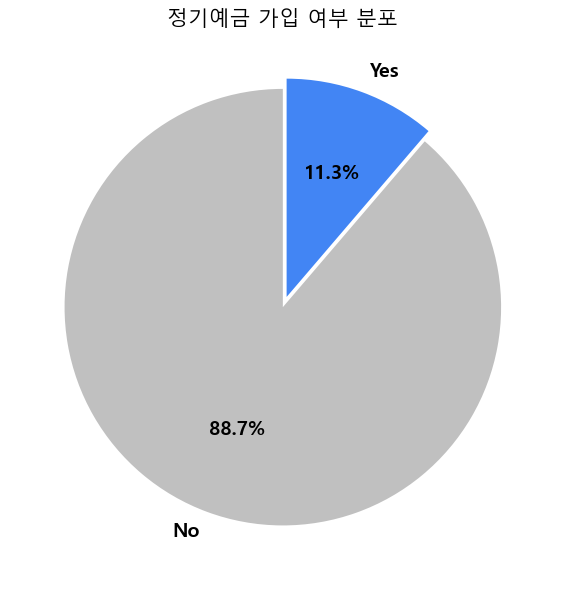

In [21]:
plt.figure(figsize=(6, 6))
counts = df['y'].value_counts()
colors = ['#c0c0c0', '#4285f4']
plt.pie(counts, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 14, 'fontweight': 'bold'},
        explode=(0, 0.05))
plt.title('정기예금 가입 여부 분포', fontsize=15)
plt.tight_layout()
plt.show()

이 그래프를 보여주는 이유

yes 가 11% 밖에 안됨. 이게 문제인 이유:
모델이 아무 생각 없이 전부 no라고 예측해도 정확도가 89%가 나온다는 의미임

그래서 이 그래프가 EDA의 시작점
1. 데이터는 yes가 11%로 불균형하다~
2. 그래서 단순 정확도가 아닌 다른 지표 ____ 를 사용했고,
3. _____ 처리를 했다.

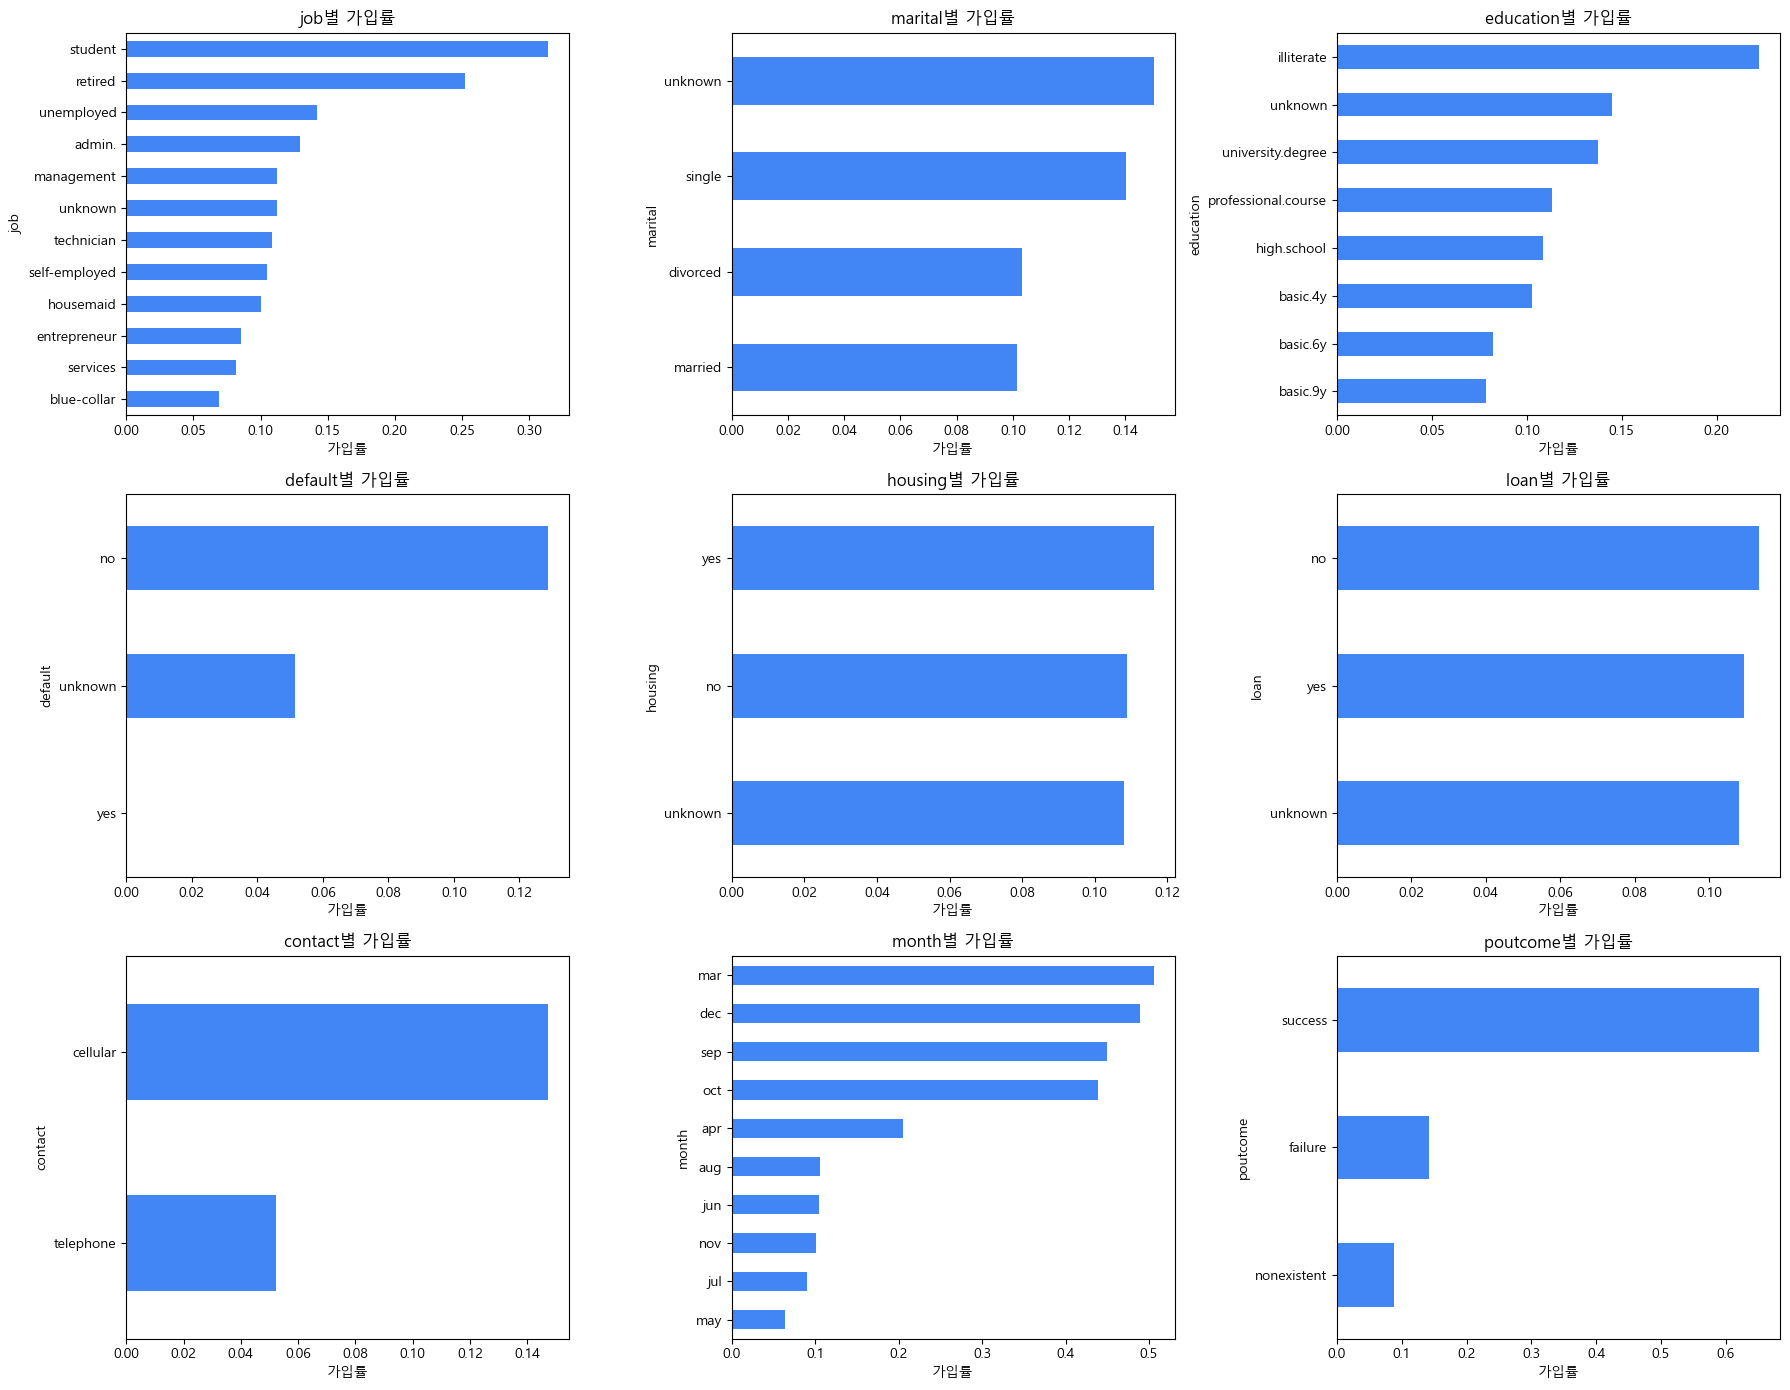

=== 범주형 변수 영향력 (가입률 max - min) ===
  job            : 6.9% ~ 31.4%  (차이: 24.5%p)
  marital        : 10.2% ~ 15.0%  (차이: 4.8%p)
  education      : 7.8% ~ 22.2%  (차이: 14.4%p)
  default        : 0.0% ~ 12.9%  (차이: 12.9%p)
  housing        : 10.8% ~ 11.6%  (차이: 0.8%p)
  loan           : 10.8% ~ 11.3%  (차이: 0.5%p)
  contact        : 5.2% ~ 14.7%  (차이: 9.5%p)
  month          : 6.4% ~ 50.5%  (차이: 44.1%p)
  poutcome       : 8.8% ~ 65.1%  (차이: 56.3%p)


In [ ]:
#범주형 변수 상관관계

cat_cols = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'poutcome']

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
for ax, col in zip(axes.ravel(), cat_cols):
    rate = df.groupby(col)['y'].apply(lambda x: (x == 'yes').mean()).sort_values()
    rate.plot(kind='barh', ax=ax, color='#4285f4')
    ax.set_title(f'{col}별 가입률')
    ax.set_xlabel('가입률')
plt.tight_layout()
plt.show()

# 범주형 변수별 가입률 범위 (max - min) 로 영향력 비교
print('=== 범주형 변수 영향력 (가입률 max - min) ===')
for col in cat_cols:
    rate = df.groupby(col)['y'].apply(lambda x: (x == 'yes').mean())
    diff = rate.max() - rate.min()
    print(f'  {col:15s}: {rate.min()*100:.1f}% ~ {rate.max()*100:.1f}%  (차이: {diff*100:.1f}%p)')

In [ ]:
# 수치형 변수 상관계수
df['y_num'] = (df['y'] == 'yes').astype(int)

# 수치형 변수만 선택
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
            'euribor3m', 'nr.employed', 'y_num']

corr = df[num_cols].corr()
y_corr = corr['y_num'].drop('y_num').abs().sort_values(ascending=False)

# y와의 상관계수 정렬
print('=== y(정기예금 가입)와의 상관계수 (절대값 기준) ===')
print(y_corr)

=== y(정기예금 가입)와의 상관계수 (절대값 기준) ===
duration          0.405274
nr.employed       0.354678
pdays             0.324914
euribor3m         0.307771
emp.var.rate      0.298334
previous          0.230181
cons.price.idx    0.136211
campaign          0.066357
cons.conf.idx     0.054878
age               0.030399
Name: y_num, dtype: float64


In [ ]:
# 범주형 컬럼 상관계수

from sklearn.preprocessing import LabelEncoder

df2 = df.copy()
df2['y_num'] = (df2['y'] == 'yes').astype(int)

cat_cols = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'poutcome']

# 범주형 → 숫자 인코딩 후 상관계수
le = LabelEncoder()
for col in cat_cols:
    df2[col + '_enc'] = le.fit_transform(df2[col])

enc_cols = [col + '_enc' for col in cat_cols]
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
            'euribor3m', 'nr.employed']

all_corr = df2[num_cols + enc_cols + ['y_num']].corr()['y_num'].drop('y_num').abs().sort_values(ascending=False)
print('=== 전체 변수 y와의 상관계수 (절대값) ===')
print(all_corr)

=== 전체 변수 y와의 상관계수 (절대값) ===
duration          0.405274
nr.employed       0.354678
pdays             0.324914
euribor3m         0.307771
emp.var.rate      0.298334
previous          0.230181
contact_enc       0.144773
cons.price.idx    0.136211
poutcome_enc      0.129789
default_enc       0.099352
campaign          0.066357
education_enc     0.057799
cons.conf.idx     0.054878
marital_enc       0.046203
age               0.030399
job_enc           0.025122
housing_enc       0.011552
month_enc         0.006065
loan_enc          0.004909
Name: y_num, dtype: float64


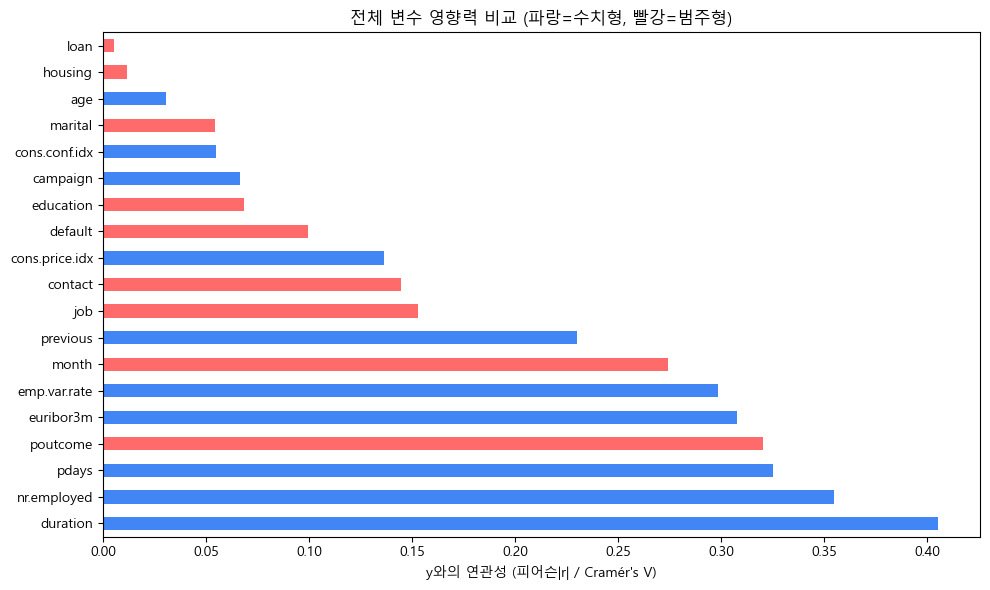

duration          0.405274
nr.employed       0.354678
pdays             0.324914
poutcome          0.320488
euribor3m         0.307771
emp.var.rate      0.298334
month             0.274395
previous          0.230181
job               0.152768
contact           0.144693
cons.price.idx    0.136211
default           0.099354
education         0.068472
campaign          0.066357
cons.conf.idx     0.054878
marital           0.054570
age               0.030399
housing           0.011748
loan              0.005154
dtype: float64


In [ ]:
# 수치형 + 범주형 같이 비교한 것

from scipy.stats import chi2_contingency

def cramers_v(col):
    ct = pd.crosstab(df[col], df['y'])
    chi2 = chi2_contingency(ct)[0]
    n = len(df)
    k = min(ct.shape) - 1
    return np.sqrt(chi2 / (n * k))

cat_cols = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'poutcome']

# 범주형: Cramér's V
cat_result = pd.Series({col: cramers_v(col) for col in cat_cols})

# 수치형: 피어슨 상관계수 절대값
df['y_num'] = (df['y'] == 'yes').astype(int)
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
            'euribor3m', 'nr.employed']
num_result = df[num_cols + ['y_num']].corr()['y_num'].drop('y_num').abs()

# 합쳐서 비교
all_result = pd.concat([num_result, cat_result]).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = ['#4285f4' if col in num_cols else '#ff6b6b' for col in all_result.index]
all_result.plot(kind='barh', color=colors)
plt.xlabel('y와의 연관성 (피어슨|r| / Cramér\'s V)')
plt.title('전체 변수 영향력 비교 (파랑=수치형, 빨강=범주형)')
plt.tight_layout()
plt.show()

print(all_result)

범주형 / 수치형  상관관계를 따로 비교하는 이유

수치형 변수 -> 피어슨 상관계수
숫자 vs 숫자의 선형 관계를 측정함
ex_ 'duration'이 100 -> 200 -> 300 올라갈 때 가입률도 같이 올라가는지

범주형 변수 -> Cramér's V (크래머의 V)
카테고리 vs 카테고리의 연관성을 측정
ex_ 'job'이 student일 때와 retired일 때 가입률이 다른가?


그래서 왜 같은 방법을 쓸 수 없는건데?
job = student, retired ..... 이걸 숫자로 바꾸면?

admin = 0, student = 1, retired = 2 ????
admin = 1, student = 0, retired = 1 ????
순서가 없으니 숫자를 매길 수 없고, 피어슨 상관관계를 쓰면 의미가 없는 값이 나옴



그래서 통합으로 비교하기 위해서는 피어슨 따로 / 크래머 따로 해서 0~1 사이의 범위로 만들어주고 합쳐서 비교를 하게 됨
그러나 완전히 동일한 척도는 아님. 소수점 단위까지 정밀하게 비교하는건 의미가 없고,  상위/중위/하위권 비교  용도로 쓰는거임

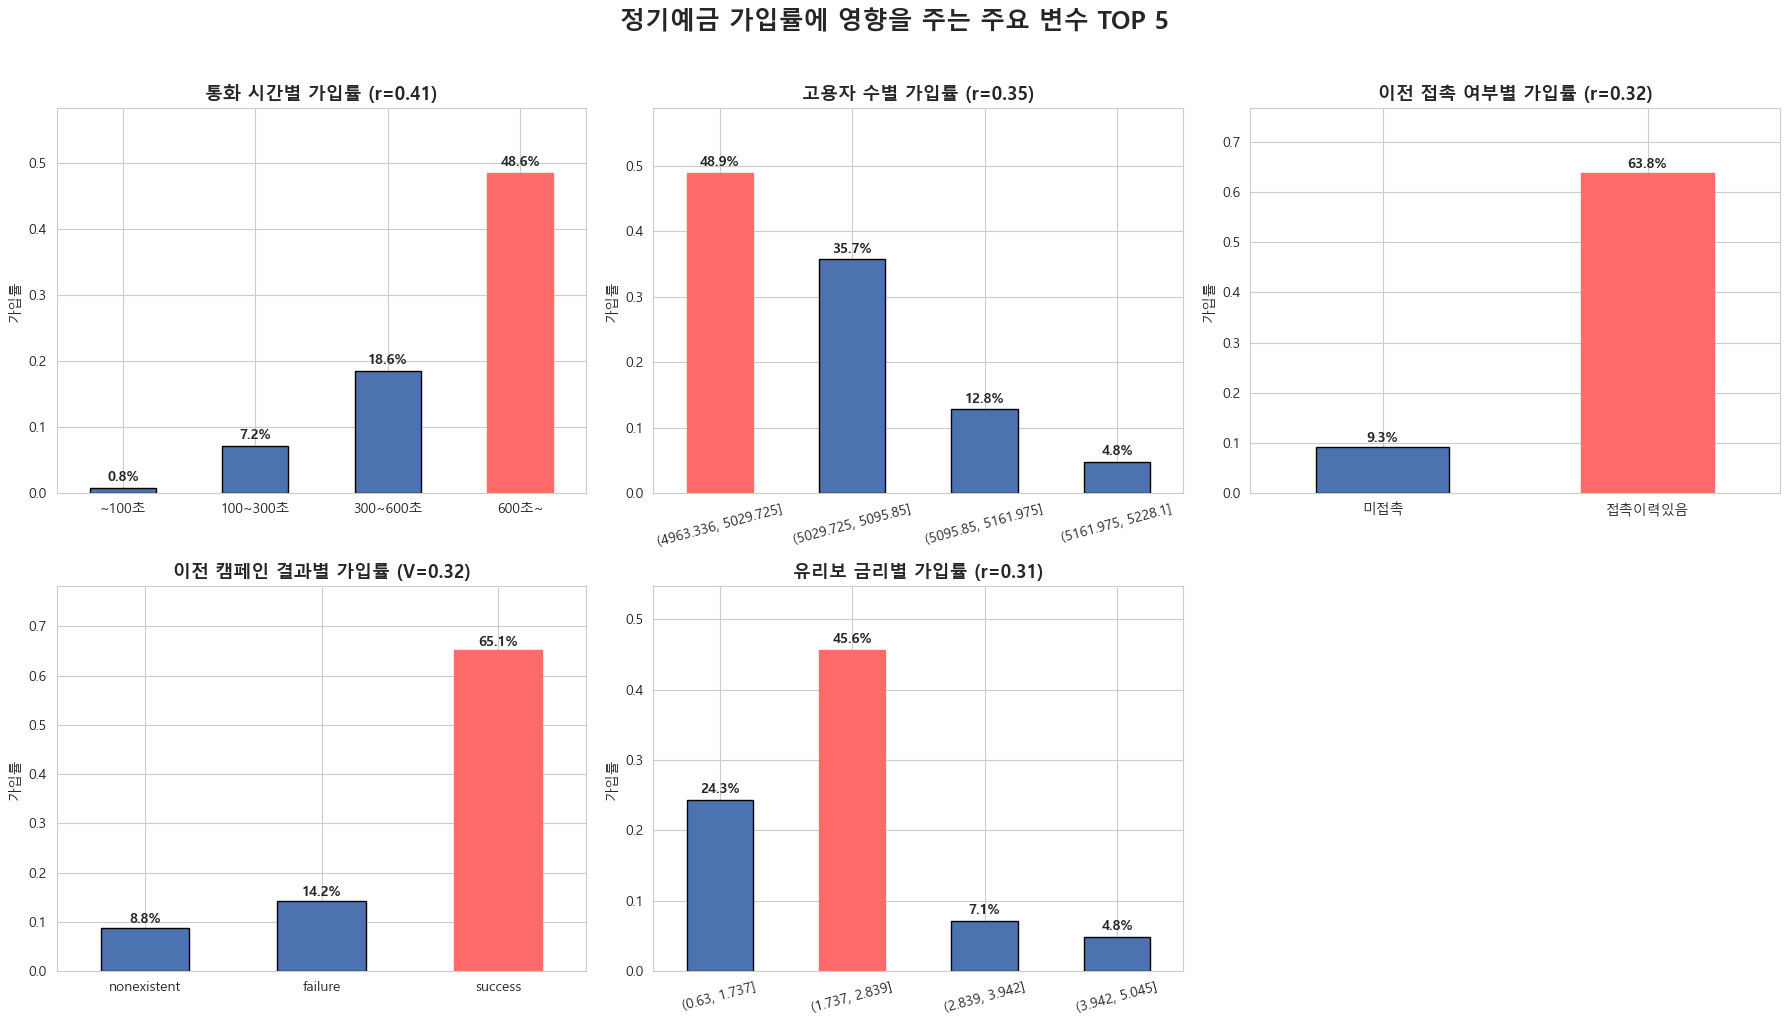

In [34]:
#상관관계가 높은 거 Top 5

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

main_color = "#4C72B0"
highlight_color = "#ff6b6b"

def plot_bar(rate, ax, title, rotation=0):
    bars = rate.plot(kind="bar", ax=ax, color=main_color, edgecolor="black")

    # 가장 높은 값 강조
    max_idx = rate.values.argmax()
    bars.patches[max_idx].set_color(highlight_color)

    # 퍼센트 표시
    for i, v in enumerate(rate):
        ax.text(i, v + 0.01, f"{v*100:.1f}%", ha="center", fontsize=10, fontweight="bold")

    ax.set_title(title, fontsize=13, fontweight="bold")
    ax.set_ylabel("가입률")
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)
    ax.set_ylim(0, rate.max() * 1.2)


# 1️⃣ duration
df["duration_group"] = pd.cut(df["duration"], bins=[0, 100, 300, 600, 5000],
                              labels=["~100초", "100~300초", "300~600초", "600초~"])
rate = df.groupby("duration_group", observed=False)["y"].apply(lambda x: (x == "yes").mean())
plot_bar(rate, axes[0, 0], "통화 시간별 가입률 (r=0.41)")

# 2️⃣ nr.employed
df["nr_group"] = pd.cut(df["nr.employed"], bins=4)
rate = df.groupby("nr_group", observed=False)["y"].apply(lambda x: (x == "yes").mean())
plot_bar(rate, axes[0, 1], "고용자 수별 가입률 (r=0.35)", rotation=15)

# 3️⃣ pdays
df["pdays_group"] = df["pdays"].apply(lambda x: "미접촉" if x == 999 else "접촉이력있음")
rate = df.groupby("pdays_group", observed=False)["y"].apply(lambda x: (x == "yes").mean())
plot_bar(rate, axes[0, 2], "이전 접촉 여부별 가입률 (r=0.32)")

# 4️⃣ poutcome
rate = df.groupby("poutcome", observed=False)["y"].apply(lambda x: (x == "yes").mean()).sort_values()
plot_bar(rate, axes[1, 0], "이전 캠페인 결과별 가입률 (V=0.32)")

# 5️⃣ euribor3m
df["euribor_group"] = pd.cut(df["euribor3m"], bins=4)
rate = df.groupby("euribor_group", observed=False)["y"].apply(lambda x: (x == "yes").mean())
plot_bar(rate, axes[1, 1], "유리보 금리별 가입률 (r=0.31)", rotation=15)

# 6️⃣ 빈 subplot 제거
axes[1, 2].axis("off")

plt.suptitle("정기예금 가입률에 영향을 주는 주요 변수 TOP 5",
             fontsize=18, fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()


상관관계가 높다? = 그 변수의 값이 바뀌면 Y(가입여부)도 같이 바뀐다.

양의 상관 (값이 높으면? -> 가입률도 높음)
duration(0.41) - 통화시간이 길수록 가입할 확률이 높음
pdays(0.32) - 이전에 접촉한 적 있으면 가입할 확률이 높음
previous(0.23) - 이전에 접촉 횟수가 많을수록 가입할 확률이 높음

음의 상관 (값이 높으면? -> 가입률이 낮음)
euribor3m (-0.31) - 금리가 높으면? 가입률이 낮음
nr.employed (-0.35) - 고용자 수가 많으면 가입률이 낮음
emp.var.rate (-0.30) - 고용변동률이 높으면 가입률이 낮음


(고용자 수가 낮을수록 왜 가입률이 높은가?)
경기가 안좋은 거니깐 -> 사람들이 안전한 자산을 원함 -> 가입률 Up
경기가 좋다? -> 고용를 많이 함 -> 주식/부동산 등으로 이동 -> 가입률 Down

흐름을 잘 기억해주세요.

EDA (상관관계 분석)
-> duration, euribor3m, poutcome이 Y(가입여부)에 영향이 크다.



비지도 학습 (클러스터링)
-> 고객이 ??개의 그룹으로 나뉘고, ??번 그룹이 가입률이 62%로 가장 높다. << 핵심 타겟이다.
비지도 학습은 Y(가입여부)를 보지 않고 패턴을 찾기 때문에, 상관관계 높은 변수를 넣어도 Y(가입여부)와 무관한 그룹이 만들어 질 수 있음



지도학습 (분류 예측)
-> 새 고객이 들어오면 가입할지 yes/no 예측


EDA (상관관계)     → 변수 후보 선정 (가이드 역할)
     ↓
모델 학습          → 실제로 넣어봄
     ↓
Feature Importance → 모델이 실제로 어떤 변수를 많이 썼는지 확인

EDA는 "이 변수가 유망하다"는 힌트이고, 최종 판단은 모델의 Feature Importance로 확인하는 것입니다. 발표에서도 "EDA에서 중요하다고 판단한 변수를 모델에 넣었고, Feature Importance에서도 실제로 높게 나왔다~~ 라는 느낌으로